In [92]:
# 1.Importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

# 2.Reading the dataset named 'insurance.csv'
Data  = pd.read_csv('insurance.csv') 


In [93]:
# Viewing the first 5 rows of the data
Data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
# 3.a.Seeing the shape of the data
Data.shape 

(1338, 7)

In [209]:
print("The data frame has {} rows and {} columns".format(Data.shape[0],Data.shape[1]))

The data frame has 1338 rows and 7 columns


In [58]:
# 3.b.Seeing the data types and null values of each of the attributes
Data.info() 
Data.dtypes.value_counts() # Age and number of children are int; BMI and charges are floats; sex, smoker and region is objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


object     3
float64    2
int64      2
dtype: int64

In [210]:
# 3.c.Checking the presence of missing values
# There are no null values as all (1338 rows) shows a non-null count for all rows in .info() function.
# However, below function can be used to be sure.

Data.apply(lambda x:sum(x.isnull()))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [211]:
print('There are no null values in the dataframe')

There are no null values in the dataframe


In [41]:
# 3.d.5 point summary of numerical attributes
Data.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


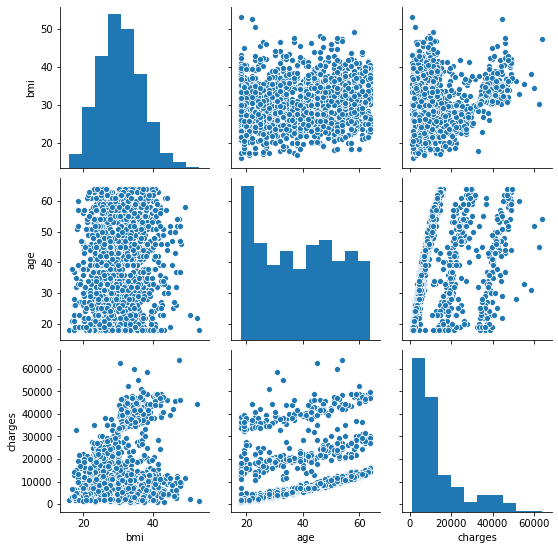

In [96]:
# 3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

# We can plot a pairplot right away as the features are continuous and we can get an idea of the related scatter plots as well 
sns.pairplot(Data[['bmi','age','charges']])

# After this, we can look into each feature in further detail, individually.

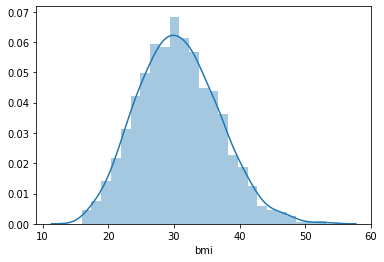

In [222]:
#Plotting distribution of bmi
sns.distplot(Data['bmi'])
plt.show()

In [90]:
print('The distrubition of bmi looks like a normal distribution')

The distrubition of bmi looks like a normal distribution


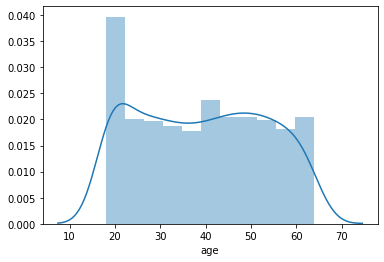

In [220]:
# Plotting the distribution of age
sns.distplot(Data['age'])
plt.show()

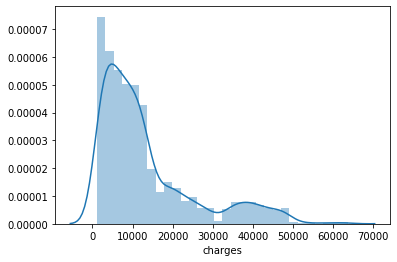

In [218]:
# Plotting the distribution of charges
sns.distplot(Data['charges'])
plt.show()

In [91]:
print('Bulk of the data lies on the left side of the distribution, however, there are many values spread towards the right end as well.')

Bulk of the data lies on the left side of the distribution, however, there are many values spread towards the right end as well.


In [88]:
# 3.f.Measure of skewness 

Data.skew(axis = None)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [89]:
# Skewness of BMI
Data['bmi'].skew()

0.2840471105987448

In [234]:
print('A skewness value of 0.2 of bmi column denotes a distribution which is close to being symmetrical. The tail is slightly larger on the right side of the distribution.')

A skewness value of 0.2 of bmi column denotes a distribution which is close to being symmetrical. The tail is slightly larger on the right side of the distribution.


In [230]:
# Skewness of Age
Data['age'].skew()

0.05567251565299186

In [ ]:
print('The age coloumn has a very small value of skewness of about 0.05')

In [226]:
# Skewness of Charges
Data['charges'].skew()

1.5158796580240388

In [236]:
print('A big positive skewness value such as 1.5 is indicative of the asymmetry in the distribution.The tail is significantly larger on the right side of the charges distribution.')

A big positive skewness value such as 1.5 is indicative of the asymmetry in the distribution.The tail is significantly larger on the right side of the charges distribution.


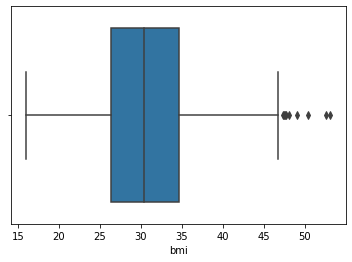

In [82]:
# 3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns.

# Plotting for BMI

sns.boxplot(x=Data['bmi'])

In [248]:
print('Some outliers (approx 6-7) exist in bmi column.')

Some outliers (approx 6-7) exist in bmi column.


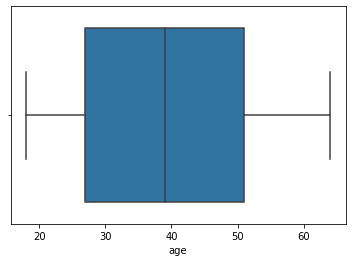

In [83]:
# Plotting for age

sns.boxplot(x=Data['age'])

In [246]:
print('No outliers exist in the age column.')

No outliers exist in the age column.


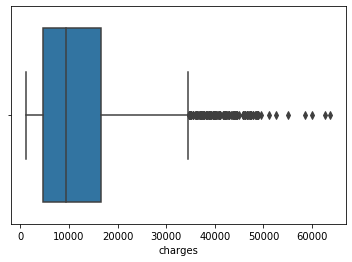

In [84]:
# Plotting for Charges

sns.boxplot(x=Data['charges'])

In [249]:
print('High number of outliers exist in the charges column.')

High number of outliers exist in the charges column.


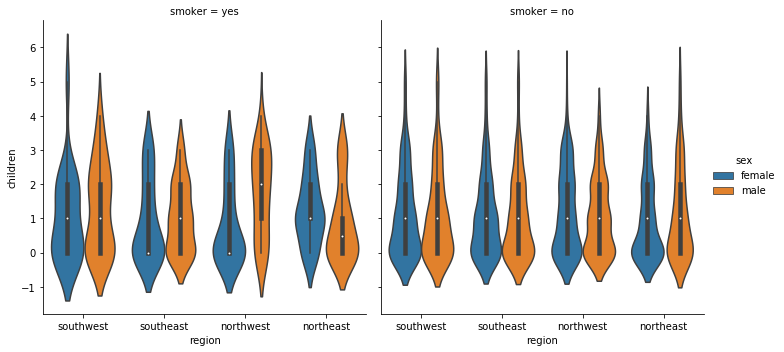

In [86]:
# 3.h.Using violen plot to visual the width of the distributions of the categorical data
sns.catplot(x = 'region', y = 'children', data = Data, hue = 'sex', kind = 'violin', col = 'smoker')

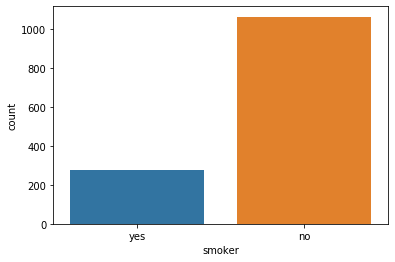

In [213]:
sns.countplot(Data['smoker'])
plt.show()

In [244]:
Data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [199]:
print ('There are significantly higher (approx 4 times) number of non-smokers than smokers')

There are significantly higher (approx 5 times) number of non-smokers than smokers


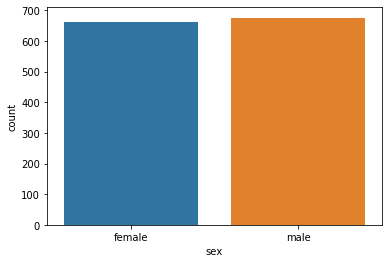

In [212]:
sns.countplot(Data['sex'])
plt.show()

In [243]:
Data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [242]:
print ('There are almost same number of males and females')

There are almost same number of males and females


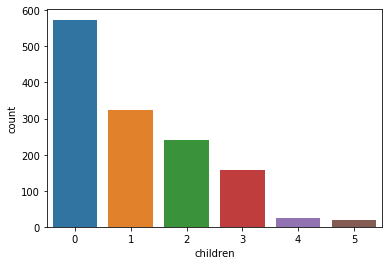

In [217]:
sns.countplot(Data['children'])
plt.show()

In [216]:
Data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

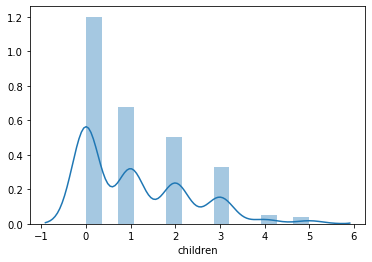

In [241]:
# We can also see the frequency distribution of children column
sns.distplot(Data['children'])
plt.show()

In [202]:
print('As the number of children increase, the count of entries with said number of children steadily decrease')

As the number of children increase, the count of entries with said number of children steadily decrease


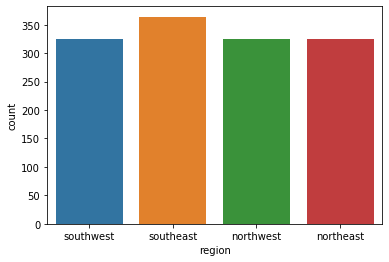

In [215]:
#Plot dipicting the count of the regions 
sns.countplot(Data['region'])
plt.show()

In [58]:
Data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [59]:
print('All 4 regions are more or less equal with southeast being slight higher')

All 4 regions are more or less equal with southeast being slight higher


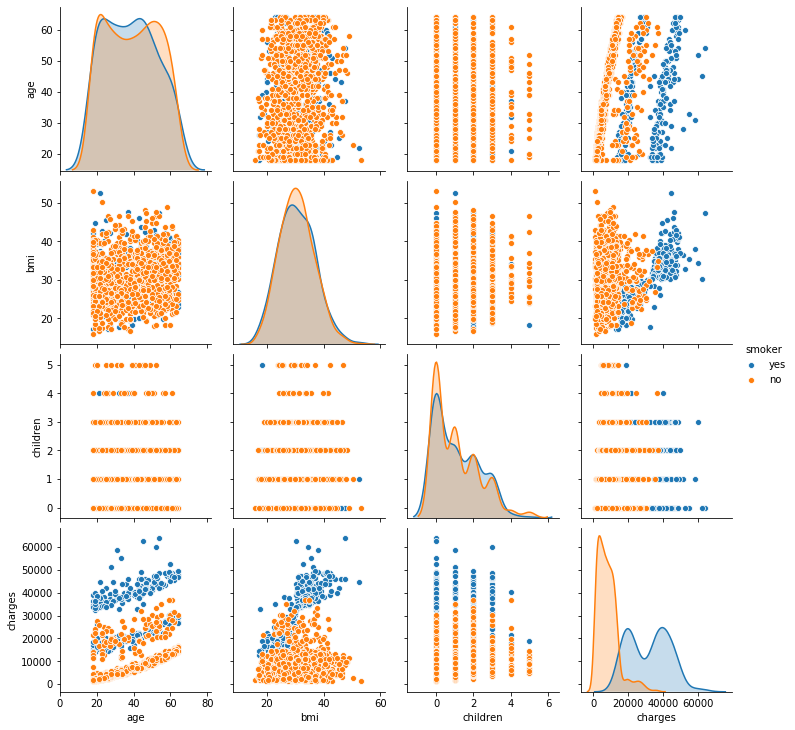

In [237]:
# 3.i.We can include all the column of the dataframe by showing multiple pairplots and using hue to contrast the categorical variables against the numerical ones.

# Pairplot with hue selected as smoker
sns.pairplot(Data, hue='smoker') 
plt.show()

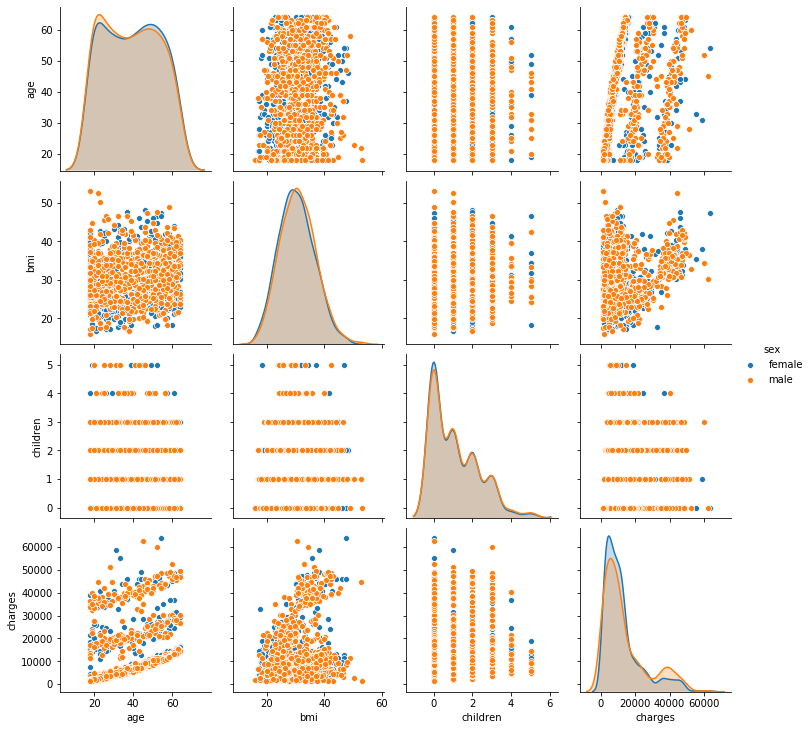

In [238]:
# Pairplot with hue selected as sex
sns.pairplot(Data, hue='sex') 
plt.show()

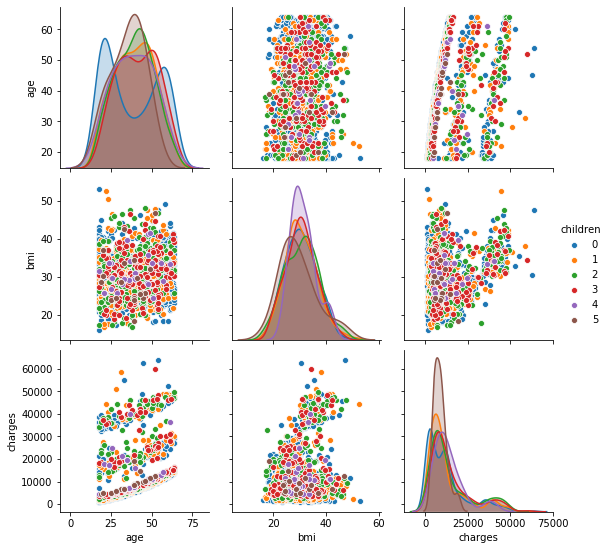

In [239]:
# Pairplot with hue selected as children
sns.pairplot(Data, hue='children') 
plt.show()

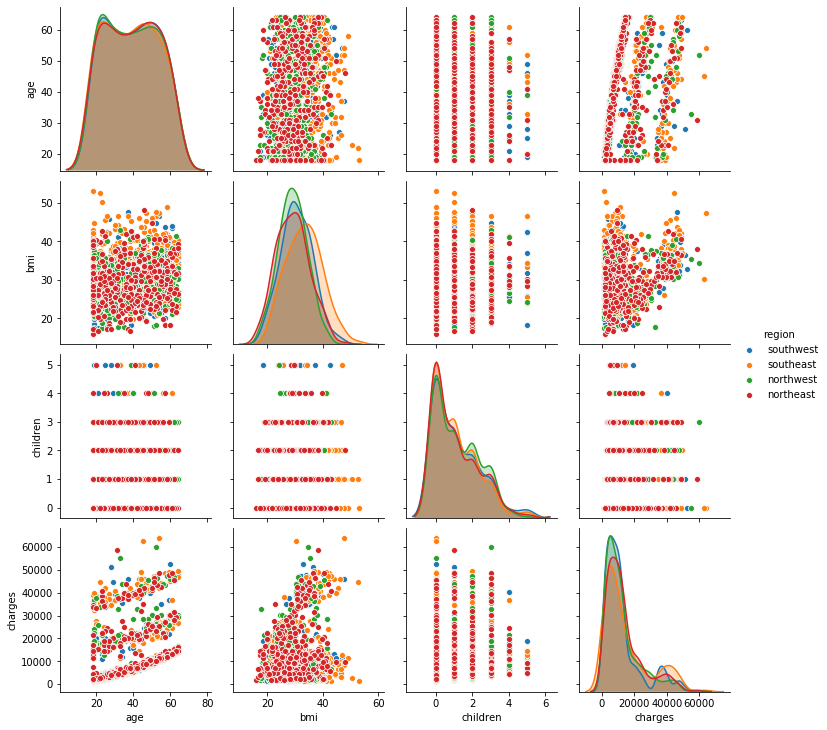

In [240]:
sns.pairplot(Data, hue='region') #Pairplot with hue selected as region
plt.show()

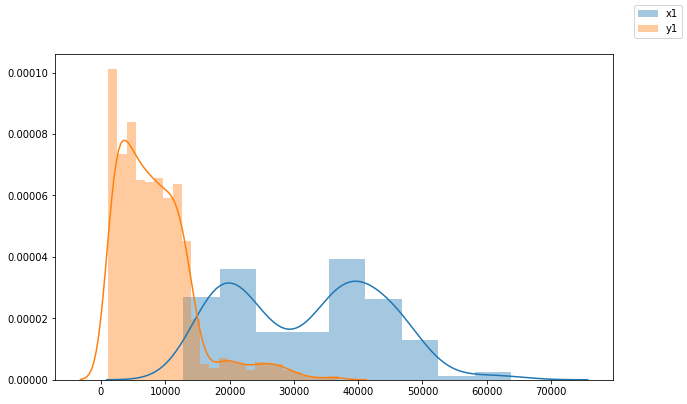

In [104]:
# 4.a. Do charges of people who smoke differ significantly from the people who don't?
# Since we can generate a numeric array of charges with respect to smoker or not, we can simply do a t-test to compare the two samples.

# Defining the Hypothesis
# Null Hypothesis (H0) = "Smoking or not does not have a difference with regards to the charges"
# Alternate hypothesis (H1) = "Smoking or not does have a difference with regards to the charges" 

# Taking Sample 1 as array of charges values corresponding to smoker
x1 = np.array(Data[Data['smoker'] == 'yes']['charges']) 
# Taking Sample 2 as array of charges values corresponding to non smoker
y1 = np.array(Data[Data['smoker'] == 'no']['charges'])

fig = plt.figure(figsize = (10,6))
sns.distplot(x1)
sns.distplot(y1)
fig.legend(labels = ["x1","y1"])

In [102]:
print('Graphically we can see that there is a significant difference in the two distributions')

Graphically we can see that there is a significant difference in the two distributions


In [81]:
#However, we must run a two sided t test to verify 
t_statistic, p_value = stats.ttest_ind(x,y)
t_statistic, p_value

(46.664921172723716, 8.271435842177219e-283)

In [84]:
if p_value >0.05:
    print("Smoking or not does not have a difference with regards to the charges(reject H0)")
else:
    print("Smoking or not does have a difference with regards to the charges(accept H0)")

Smoking or not does have a difference with regards to the charges(accept H0)


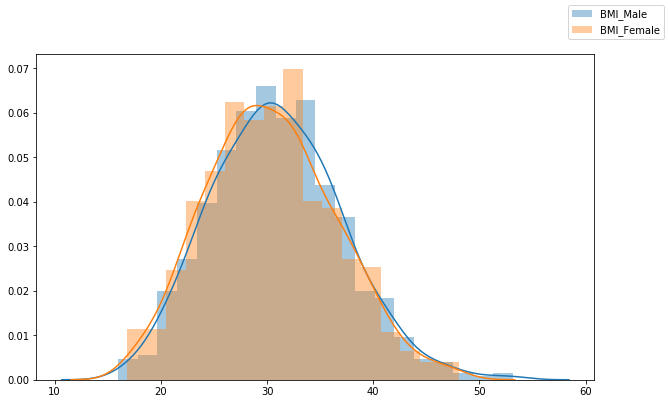

In [78]:
# 4.b. Does bmi of males differ significantly from that of females?
# Similarly, as BMI is a numeric feature and we can generate 2 sample arrays of BMI correspeding to the categorical features of male and female,
# We can do a t-test 

# Defining the Hypothesis
# Null Hypothesis (H0) = "bmi does not vary with gender"
# Alternate hypothesis (H1) = "bmi does vary gender" 

# Taking Sample 1 as and array of bmi values corresponding to males
x = np.array(Data[Data['sex'] == 'male']['bmi'])
# Taking Sample 2 as and array of bmi values corresponding to females
y = np.array(Data[Data['sex'] == 'female']['bmi'])

fig = plt.figure(figsize = (10,6))
sns.distplot(x)
sns.distplot(y)
fig.legend(labels = ["BMI_Male","BMI_Female"])

In [103]:
print('Graphically, we can see that the there is high similarity in both the distributions.')

Graphically, we can see that the there is high similarity in both the distributions.


In [79]:
# However, we must run a two sided T-test to verify 

t,p_value = stats.ttest_ind(x,y,axis =0)
if p_value <0.05:
    print("BMI does vary gender(reject H0)")
else:
    print("BMI does not vary with gender(accept H0)")

BMI does not vary with gender(accept H0)


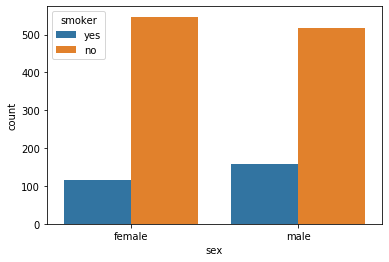

In [98]:
# 4.c.Is the proportion of smokers significantly different in different genders?

# First, we can plot to get a graphical idea of the data.
sns.countplot(Data['sex'], hue = Data['smoker'])

In [105]:
print('We can see a difference in the number of smoker vs non smoker in the two genders, however, visual representations do not give more than a general idea, hence we must continue with statistical analysis')

We can see a difference in the number of smoker vs non smoker in the two genders, however, visual representations do not give more than a general idea, hence we must continue with statistical analysis


In [97]:
# Here we have to analyze two categorical features against each other, hence the chi sq test is most suitable.
# Starting with extracting the relevant figures of smokers and genders
crosstab = pd.crosstab(Data['smoker'], Data['sex'])
crosstab

sex,female,male
smoker,,
no,547,517
yes,115,159


In [20]:
# Defining the null and alternate hypothesis
# Null sypothesis (H0) = "There is no significant difference in proportion of smokers with respect to male or female"
# Alternate hypothesis (H1) = "There is a significant difference in proportion of smokers with respect to male or female" 

# Define significance level = 0.05

# Calculating expected values using Exp = (Row Total * Column Total)/Total Observations

# We can redefine the above crosstab table in terms of expected values as 
# E11 = expected value of smoker=no and sex= female
# E12 = expected value of smoker=no and sex= male
# E21 = expected value of smoker=yes and sex= female
# E22 = expected value of smoker=yes and sex= male

E11 = ((547+517)*(547+115)/1338)
print("Expected value of smoker=no and sex=female is {}".format(E11))
E12 = ((547+517)*(517+159)/1338)
print("Expected value of smoker=no and sex= male is {}".format(E12))
E21 = ((115+159)*(547+115)/1338)
print("Expected value of smoker=yes and sex= female is {}".format(E21))
E22 = ((115+159)*(517+159)/1338)
print("Expected value of smoker=yes and sex= male is {}".format(E22))



Expected value of smoker=no and sex=female is 526.4334828101644
Expected value of smoker=no and sex= male is 537.5665171898356
Expected value of smoker=yes and sex= female is 135.56651718983557
Expected value of smoker=yes and sex= male is 138.43348281016443


In [24]:
# We can calculated the individual Chi values denoted as x which can then be summed up to achieve the chisquare value as below.
xE11 = np.square(547-E11)/E11
print("xE11 is {}".format(xE11))
xE12 = np.square(517-E12)/E12
print("xE12 is {}".format(xE12))
xE21 = np.square(115-E21)/E21
print("xE21 is {}".format(xE21))
xE22 = np.square(159-E22)/E22
print("XE22 is {}".format(xE22))

xE11 is 0.8034854224352866
xE12 is 0.7868451917931356
xE21 is 3.120103976172045
XE22 is 3.0554864382039844


In [25]:
# Summing the individual chi values above 

chisquare = xE11+xE12+xE21+xE22
print("chi-square is {}".format(chisquare))

chi-square is 7.765921028604452


In [26]:
# Finding degree of freedom (v) 

v = (2-1)*(2-1)
print("degree of freedom is {}".format(v))

degree of freedom is 1


In [77]:
# Now, we can compare this value to the critical value in chisquare table where deg of freedom is 1 and confidence level is 95%
# The critical value is 3.841 as per lower tail value table https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm
chi_critical = 3.841
if chisquare<chi_critical:
    print("There is'nt a significant difference in proportion of smokers with respect to genders(fail to reject H0)")
else:
    print("There is a significant difference in proportion of smokers with respect to genders(reject H0)")


There is a significant difference in proportion of smokers with respect to genders(reject H0)


In [39]:
# We can also use a Z-test to reach a similar result *Taking the lecture 'Test of proportion and variance' as reference*
# However, chi square test is still more suited in this case.

female_smokers = Data[Data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = Data[Data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = Data.sex.value_counts()[1] # number of females in the data
n_males = Data.sex.value_counts()[0] #number of males in the data

In [100]:

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} There is a difference in proportion of smokers with respect to genders(reject H0)')
else:
    print(f'With a p-value of {round(pval,4)} There isnt difference in proportion of smokers with respect to genders(fail to reject H0)')

With a p-value of 0.0053 There is a difference in proportion of smokers with respect to genders(reject H0)


In [46]:
# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same?

# Null Hypothesis (H0) = "The distribution of bmi across women with no children,one child and two children is the same"
# Alternate hypothesis (H1) = "The distribution of bmi across women with no children,one child and two children is not the same"

# Creating a new dataframe of women who have children less than or equal to 2

new_df = Data[(Data['children']<=2) & (Data['sex']=='female')]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


C:\Users\Shueyb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


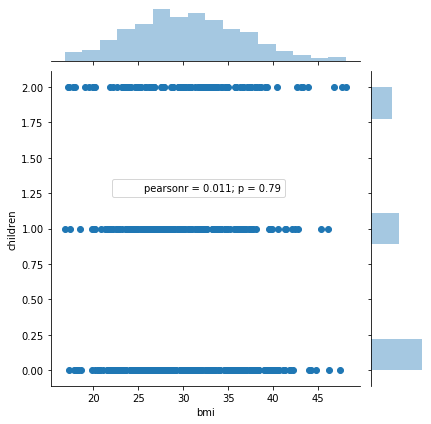

In [56]:
# Plotting jointplot between BMI and children
jp_BMI_Child = sns.jointplot(new_df['bmi'],new_df['children'])
jp_BMI_Child = jp_BMI_Child.annotate(stats.pearsonr, loc=(0.2, 0.6))
plt.show()

In [101]:
print('From the jointplot we can get an idea that the p value is around 0.79 which indicates that we should accept the H0, however, we should go for further anylysis to verify.')

From the jointplot we can get an idea that the p value is around 0.79 which indicates that we should accept the H0, however, we should go for further anylysis to verify.


In [66]:
#Setting up arrays of bmi correspinding to number of children
bmi_0child    =  np.array(new_df[new_df['children'] == 0]['bmi'])
bmi_1child    =  np.array(new_df[new_df['children'] == 1]['bmi'])
bmi_2child    =  np.array(new_df[new_df['children'] == 2]['bmi'])

#Seeing the counts, means and sd of bmi varying with number of children
print('Count, Mean and standard deviation of bmi of women with no children : %3d, %3.2f and %3.2f' % (len(bmi_0child), bmi_0child  .mean(),np.std(bmi_0child  ,ddof =1)))
print('Count, Mean and standard deviation of bmi of women with one child   : %3d, %3.2f and %3.2f' % (len(bmi_1child), bmi_1child  .mean(),np.std(bmi_1child  ,ddof =1)))
print('Count, Mean and standard deviation of bmi of women with two children: %3d, %3.2f and %3.2f' % (len(bmi_2child), bmi_2child  .mean(),np.std(bmi_2child  ,ddof =1)))

Count, Mean and standard deviation of bmi of women with no children : 289, 30.36 and 5.97
Count, Mean and standard deviation of bmi of women with one child   : 158, 30.05 and 5.79
Count, Mean and standard deviation of bmi of women with two children: 119, 30.65 and 6.63


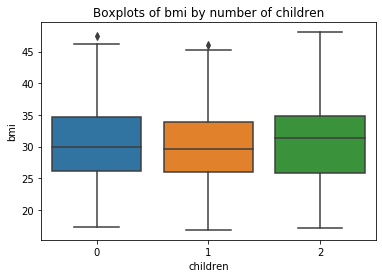

In [68]:
#Visualizing the bmi across the 3 categories of number of children to get an idea of the similarity or difference 

sns.boxplot(x = "children", y = "bmi", data = new_df)
plt.title('Boxplots of bmi by number of children')
plt.show()

In [71]:
#We can run an analysis of varience (ANOVA) to determine if the bmi across the 3 category is same or different

mod = ols('bmi ~ children', data = new_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


In [73]:
if 0.79 > 0.05:
    print("Fail to Reject Null Hypothesis i.e The distribution of bmi across women with no children,one child and two children is the same ")
else:
    print("Reject Null Hypothesis i.e The distribution of bmi across women with no children,one child and two children is not the same")

Fail to Reject Null Hypothesis i.e The distribution of bmi across women with no children,one child and two children is the same 
